In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
f = np.array([])
a = np.array([])
attempts = np.array([])
crashed = False
ind = 1

In [3]:
target = float(input("Input the desired lift force: "))
f = np.append(f,float(input("Input the lift force: ")))
a = np.append(a,float(input("Input the angle used to get that force: ")))
attempts = np.array([])
file = open("AnglesRun"+str(dt.now().year)+str(dt.now().month)+str(dt.now().day)+str(dt.now().hour)+str(dt.now().minute)+str(dt.now().second)+".txt", "a")
file.write("%20s: Force: %8.5f \n"%("Target",target))
file.write("%20s: Force: %8.5f, AoA: %8.5f \n"%("Starting Conditions",f[0],a[0]))

56

The new estimated angle of attack is 5.760960171192969


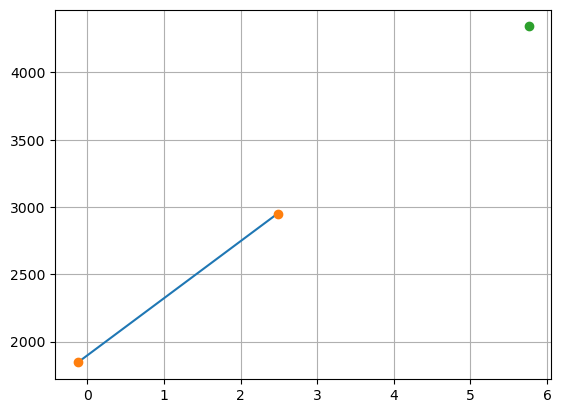

The new estimated angle of attack is 5.642001568678396


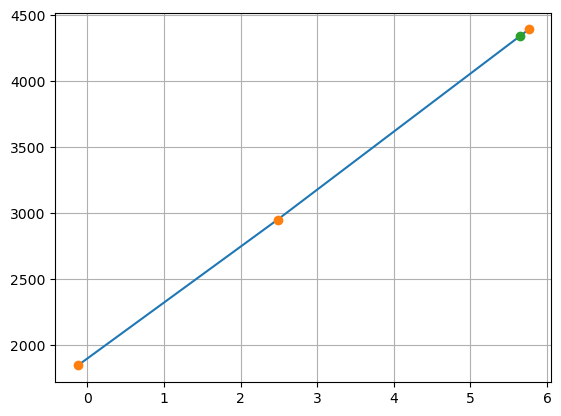

ValueError: could not convert string to float: ''

In [4]:
while not crashed:
    f = np.append(f,float(input("Input the new lift force: ")))
    a = np.append(a,float(input("Input the angle used to get that force: ")))
    tempd1 = f[ind] - f[ind-1]
    tempd2 = a[ind] - a[ind-1]
    tempd3 = tempd1/tempd2
    #attempts = np.append(attempts,(target/tempd3)-(f[ind]/tempd3)-a[ind])
    attempts = np.append(attempts,(target+((a[ind]*tempd3)-f[ind]))/tempd3)
    print("The new estimated angle of attack is "+str(attempts[ind-1]))
    temp = input("Run again? [y/n] ")
    file.write("%20s: Force: %8.5f, AoA: %8.5f, Guess: %8.5f temp1: %8.5f, temp2: %8.5f, temp3: %8.5f \n"%("Next Attempt",f[ind],a[ind],attempts[ind-1],tempd1,tempd2,tempd3))
    plt.plot(np.sort(a),np.sort(f),'-',np.sort(a),np.sort(f),'o',(target+((a[ind]*tempd3)-f[ind]))/tempd3,target,'o')
    plt.grid()
    plt.show()
    if temp == "n":
        crashed = True
    ind += 1
plt.close()
plt.plot(np.sort(a),np.sort(f),'-',np.sort(a),np.sort(f),'o',(target+((a[ind-1]*tempd3)-f[ind-1]))/tempd3,target,'o')
plt.grid()
plt.xlabel("AoA")
plt.ylabel("Lift Force")
plt.title("AoA versus Lift Force")
plt.savefig("Lift Plot",format='jpg')
file.close()